In [1]:
import os
import numpy as np

osc_freq = 50
period = 1/osc_freq

network_path = "forKadri-FS1050-1"
input_name = f"SfN2022-forKadri-oscillating-{osc_freq}Hz-ramp-up-background"
sim_file_gj = os.path.join(network_path, "simulation", f"output-GJ-{input_name}.hdf5")
sim_file_nogj = os.path.join(network_path, "simulation", f"output-noGJ-{input_name}.hdf5")
fig_path = os.path.join(network_path, "figures")
sl = None
sls_gj = None
sls_nogj = None

In [2]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(network_path)
sls_gj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_gj)
sls_nogj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_nogj)

Loading 1050 neurons with 20763 synapses and 10598 gap junctions
Loading forKadri-FS1050-1/simulation/output-GJ-SfN2022-forKadri-oscillating-50Hz-ramp-up-background.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
0: (FS_0, p4feff98b, m86da4874)
12: (FS_0, pb1ef6b01, mb1b67bcc)
18: (FS_0, p4feff98b, m86da4874)
22: (FS_0, pb1ef6b01, m15ae4048)
26: (FS_1, p6eb0c221, meffc0dfa)
41: (FS_0, p4feff98b, m4cd420e2)
44: (FS_0, p59a48310, m4cd420e2)
49: (FS_1, p31916918, mf0a83676)
57: (FS_2, p71c7354b, m2353c9ea)
58: (FS_1, p6eb0c221, ma88f99b9)
77: (FS_0, pb1ef6b01, m15ae4048)
80: (FS_0, pb1ef6b01, m86da4874)
81: (FS_1, pf86c86e4, m9d1605c7)
83: (FS_0, p59a48310, m86da4874)
95: (FS_1, p31916918, m48f576bb)
98: (FS_3, p92705ff4, m4fdebda2)
100: (FS_1, p31916918, ma88f99b9)
101: (FS_0, pb1ef6b01, m15ae4048)
107: (FS_1, p31916918, meffc0dfa)
116: (FS_0, pb1ef6b01, mb1b67bcc)
117: (FS_0, p4feff98b, m4cd420e2)
118: (FS_0, p4feff98b, m4cd420e2)
124: (F

Loading 1050 neurons with 20763 synapses and 10598 gap junctions


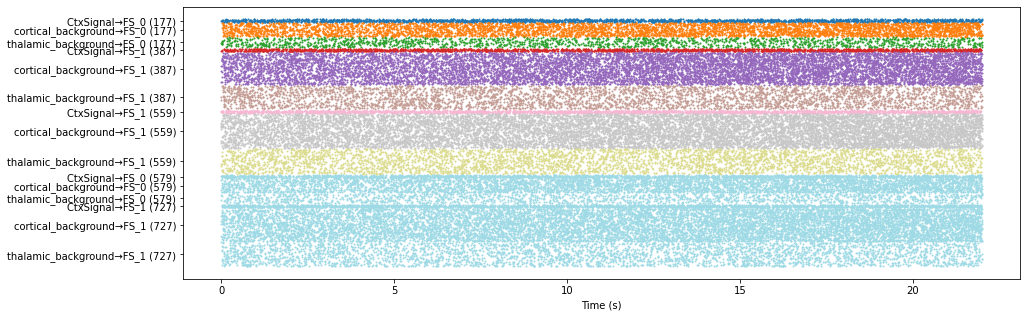

In [3]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, f"{input_name}.hdf5")
spi = PlotInput(input_file)
spi.plot_input(num_neurons=5, neuron_type="FS", fig_size=(15,5))

In [4]:
from snudda.plotting import SnuddaPlotSpikeRaster2

spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_gj, figure_path=fig_path,
                             snudda_load=sl, snudda_simulation_load=sls_gj)

spr2 = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_nogj, figure_path=fig_path,
                              snudda_load=sl, snudda_simulation_load=sls_nogj)

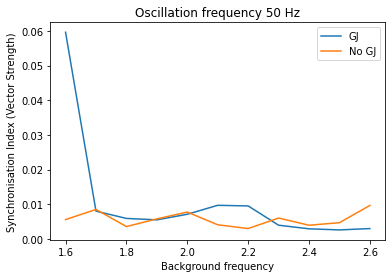

In [6]:
start_time = spi.config["FS"]["cortical_background"]["start"]
end_time =  spi.config["FS"]["cortical_background"]["end"]
background_frequency = spi.config["FS"]["cortical_background"]["frequency"]

synch_gj = []
synch_nogj = []

for st, et in zip(start_time, end_time):
    synch_gj.append(spr.calculate_period_synchrony(period=period, time_range=(st,et)))
    synch_nogj.append(spr2.calculate_period_synchrony(period=period, time_range=(st,et)))

synch_gj = np.array(synch_gj)
synch_nogj = np.array(synch_nogj)
    
import matplotlib.pyplot as plt

plt.figure()
plt.plot(background_frequency, synch_gj, label="GJ")
plt.plot(background_frequency, synch_nogj, label="No GJ")
plt.legend()
plt.xlabel("Background frequency")
plt.ylabel("Synchronisation Index (Vector Strength)")
plt.title(f"Oscillation frequency {osc_freq} Hz")
plt.savefig(f"{fig_path}/SfN2022-synchronisation-index-osc-{osc_freq}-Hz-background-varied.png")